Luke Sidle
11/01/24
Preliminary Draft


Imported plugins for all APIs here

In [12]:
import urllib
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import base64
import matplotlib.ticker as ticker
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle

This is the API I will be using for my project. It is the Swar API for the NBA and it is live updated. It is officially sourced from NBA.com so it is reliable. The purpose of this data for this project is to compare LeBron James to all of his counterparts who are stat leaders. LeBron James leads the all-time Scoring, Field Goal Attempts, and turnover stats, so they are not graphed. However, they will be mentioned in the analysis later. I believe LeBron is the most complete player in the league and that stats can prove it. 

In [13]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints._base import Endpoint
from nba_api.stats.endpoints import AllTimeLeadersGrids
from nba_api.stats.library.http import NBAStatsHTTP
from nba_api.stats.library.parameters import LeagueID, PerModeSimple, SeasonType

Here I access the data for LeBron James over his whole career. I did research and found his player number through this line of code
"players.find_players_by_first_name('lebron')" in the demonstration on their github. Starting here will give me a basis for all the players I need to access. 

In [14]:
LeBrondf = playercareerstats.PlayerCareerStats(player_id='2544')  
Johndf = playercareerstats.PlayerCareerStats(player_id='304')
Mosesdf = playercareerstats.PlayerCareerStats(player_id='77449')
Kevindf = playercareerstats.PlayerCareerStats(player_id='708')
Wiltdf = playercareerstats.PlayerCareerStats(player_id='76375')
Hakeemdf = playercareerstats.PlayerCareerStats(player_id='165')
Kareemdf = playercareerstats.PlayerCareerStats(player_id='76003')
DeAndredf = playercareerstats.PlayerCareerStats(player_id='201599')
Stephdf = playercareerstats.PlayerCareerStats(player_id='201939')
Stevedf = playercareerstats.PlayerCareerStats(player_id='70')
Karldf = playercareerstats.PlayerCareerStats(player_id='252')

Here I access the data frames of all of the LeBron's, and every other leader that is not LeBron, seasons. It has every single piece of data from NBA.com

In [15]:
LeBrondf.get_data_frames()[0]
Johndf.get_data_frames()[0]
Mosesdf.get_data_frames()[0]
Kevindf.get_data_frames()[0]
Wiltdf.get_data_frames()[0]
Hakeemdf.get_data_frames()[0]
Kareemdf.get_data_frames()[0]
DeAndredf.get_data_frames()[0]
Stephdf.get_data_frames()[0]
Stevedf.get_data_frames()[0]
Karldf.get_data_frames()[0]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,252,1985-86,00,1610612762,UTH,22.0,81,76,2475.0,504,...,0.481,174,544,718,236,105,44,279,295,1203
1,252,1986-87,00,1610612762,UTH,23.0,82,82,2857.0,728,...,0.598,278,577,855,158,104,60,237,323,1779
2,252,1987-88,00,1610612762,UTH,24.0,82,82,3198.0,858,...,0.700,277,709,986,199,117,50,325,296,2268
3,252,1988-89,00,1610612762,UTH,25.0,80,80,3126.0,809,...,0.766,259,594,853,219,144,70,285,286,2326
4,252,1989-90,00,1610612762,UTH,26.0,82,82,3122.0,914,...,0.762,232,679,911,226,121,50,304,259,2540
5,252,1990-91,00,1610612762,UTH,27.0,82,82,3302.0,847,...,0.770,236,731,967,270,89,79,244,268,2382
6,252,1991-92,00,1610612762,UTH,28.0,81,81,3054.0,798,...,0.778,225,684,909,241,108,51,248,226,2272
7,252,1992-93,00,1610612762,UTH,29.0,82,82,3099.0,797,...,0.740,227,692,919,308,124,85,240,261,2217
8,252,1993-94,00,1610612762,UTH,30.0,82,82,3329.0,772,...,0.694,235,705,940,328,125,126,234,268,2063
9,252,1994-95,00,1610612762,UTH,31.0,82,82,3126.0,830,...,0.742,156,715,871,285,129,85,236,269,2187


Now in the next three cells, I will set all of these data frames into a short script. This will allow me to access them easily throughout the project.

In [16]:
lebron = pd.DataFrame(LeBrondf.get_data_frames()[0])
robert = pd.DataFrame(Robertdf.get_data_frames()[0])
john = pd.DataFrame(Johndf.get_data_frames()[0])
moses = pd.DataFrame(Mosesdf.get_data_frames()[0])
kevin = pd.DataFrame(Kevindf.get_data_frames()[0])
wilt = pd.DataFrame(Wiltdf.get_data_frames()[0])
hakeem = pd.DataFrame(Hakeemdf.get_data_frames()[0])
kareem = pd.DataFrame(Kareemdf.get_data_frames()[0])
deandre = pd.DataFrame(DeAndredf.get_data_frames()[0])
steph = pd.DataFrame(Stephdf.get_data_frames()[0])
karl = pd.DataFrame(Karldf.get_data_frames()[0])

In [17]:
lebron.to_csv('LeBron.csv')
john.to_csv('John.csv')
moses.to_csv('Moses.csv')
kevin.to_csv('Kevin.csv')
wilt.to_csv('Wilt.csv')
hakeem.to_csv('Hakeem.csv')
kareem.to_csv('Kareem.csv')
deandre.to_csv('DeAndre.csv')
steph.to_csv('Steph.csv')
karl.to_csv('Karl.csv')

In [18]:
df1 = pd.read_csv('LeBron.csv')
df3 = pd.read_csv('John.csv')
df4 = pd.read_csv('Moses.csv')
df5 = pd.read_csv('Kevin.csv')
df6 = pd.read_csv('Wilt.csv')
df7 = pd.read_csv('Hakeem.csv')
df8 = pd.read_csv('Kareem.csv')
df9 = pd.read_csv('DeAndre.csv')
df10 = pd.read_csv('Steph.csv')
df11 = pd.read_csv('Karl.csv')

Below are all the graphs comparing LeBron to the stat leader in each documented stat available in the NBA. LeBron is always in red, while the other player is in blue. I chose scatter plots because I believe they showcase a timeline best when comparing two different stats. Also, the two players' stats are separated due to players playing at different times in the past, so the graphs would have a confusing and inconsistent x variable. Also noted, LeBron is still active so his final data point is a significant outlier of incomplete data.

Here we see LeBron compared to John Stockton in assists. In total LeBron has 11200 putting him at 4th overall for assists while Stockton has 15806 in 1st place. Stockton has higher peaks and higher lows of assists then LeBron. However, Stockton has played the role of Point Guard his entire career which genereally passes the most leading to more assist opportunities. LeBron has never played this position yet he still is very close to Stockton in these assists. This indicates that despite LeBron playing the more "selfish" positions he is still facilitating his teammates as a guard would.

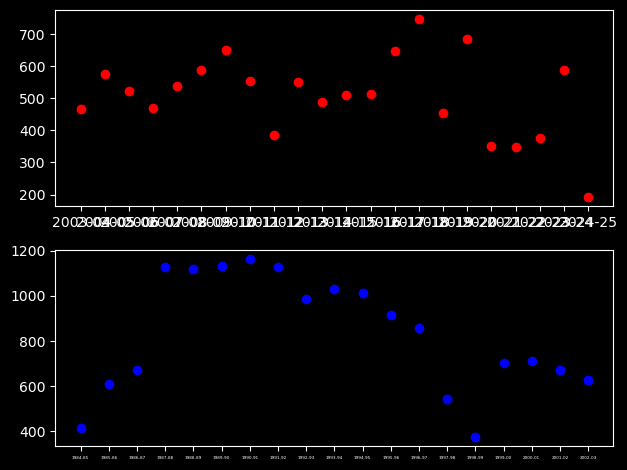

In [21]:
fig1, ax1 = plt.subplots(2) 
x = np.arange(100)
plt.style.use('dark_background')
ax1[0].scatter(df1['SEASON_ID'], df1['AST'], color = 'red')
ax1[1].scatter(df3['SEASON_ID'], df3['AST'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 3)
plt.tight_layout()
plt.show()

We again are comparing LeBron to the great John Stockton, but this time for steals. LeBron has 2288 steals in total, ranking him 8th, with a high of 177 in the 2004 season. John Stockton has 3265 steals, ranking him 1st, and a high of 244 steals in a season. Stockton, again, plays the guard position which is dedicated to attempting to steal the ball while LeBron does not play this position. This indicates that LeBron would be defying the boundaries of his role consistently to be 8th in steals all time while not even being a Guard.

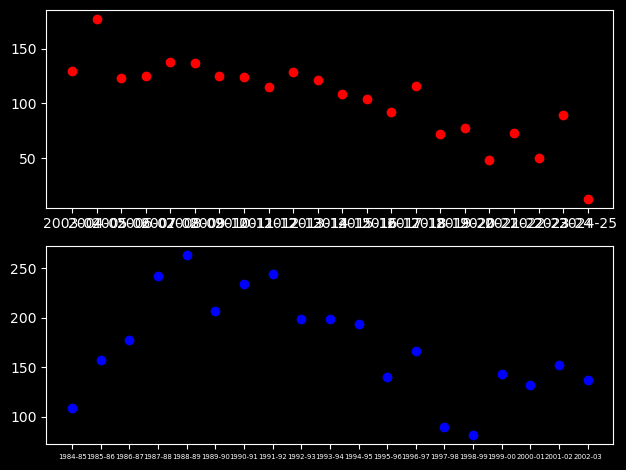

In [22]:
fig2, ax2 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax2[0].scatter(df1['SEASON_ID'], df1['STL'], color = 'red')
ax2[1].scatter(df3['SEASON_ID'], df3['STL'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Here we compare LeBron to Moses Malone in Offensive Rebounds. This is LeBron's weakest stat in consideration. He does not rank within the top 50 of Offensive rebounds. Compared to Moses Malone, a Center, with a total of 6731 OREBs who has only had 3 seasons with his total offensive rebounds below 100 in 21 professional seasons. This is not the most concerning stat since offensively LeBron is focused on shooting and is not in the paint often. 

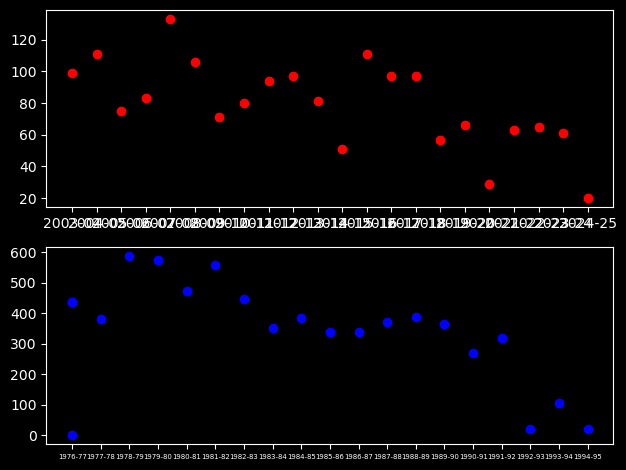

In [93]:
fig3, ax3 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax3[0].scatter(df1['SEASON_ID'], df1['OREB'], color = 'red')
ax3[1].scatter(df4['SEASON_ID'], df4['OREB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Here we compare LeBron to Kevin Garnett in Defensive Rebounds. LeBron ranks 8th in defensive rebounds with 9607 rebounds with a high of 612 rebounds in the 2017-18 season. Kevin Garnett is the leader of Defensive rebounds with 11453 in total. His career high for a season was 894 in 2003-04. These two players play similar positions defensively. They both play the forward positions, having been a power forward and small forward both. Kevin Garnett also had seasons as a center. This means both play close to the basket and have many opportunities for defensive rebounds. Compared to Garnett, LeBron's stats are still impressive as he has never dipped below 300 compared to the times Kevin has. 

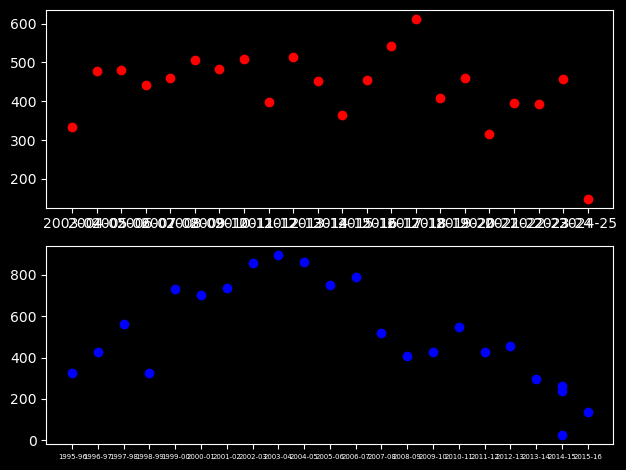

In [94]:
fig4, ax4 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax4[0].scatter(df1['SEASON_ID'], df1['DREB'], color = 'red')
ax4[1].scatter(df5['SEASON_ID'], df5['DREB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Here we compare LeBron to Wilt Chamberlin, one of the greatest centers of all time, in rebounds. This is another stat LeBron is not in the top 10 for, however he is #28. Rebounds are generally handled by the Center due to them being the paint next to basket. LeBron for most of his career has been a small forward who is not as close to the basket as the power forwards and centers. All people above him are a mix of centers, power forwards, and center-fowards. This puts LeBron as the highest placing Small Forward in rebounds once again defying points of his role and being one of the best in his most consistent role.

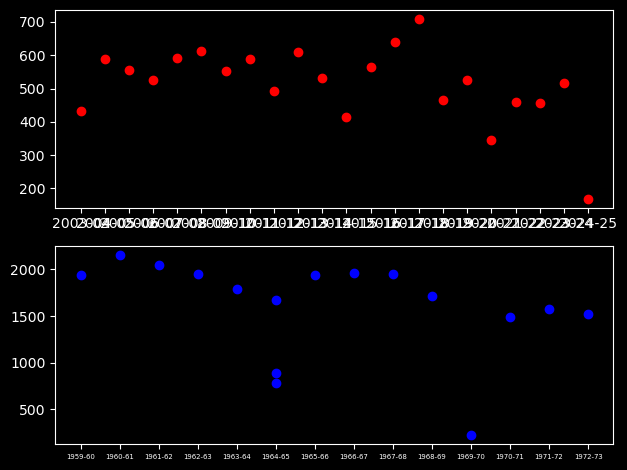

In [95]:
fig5, ax5 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax5[0].scatter(df1['SEASON_ID'], df1['REB'], color = 'red')
ax5[1].scatter(df6['SEASON_ID'], df6['REB'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Here we compare LeBron's blocks to Hakeem, one of the greatest centers of all time. This is LeBron's second weakest stat. Hakeem has 3830 blocks, while LeBron has 1,121 blocks. Hakeem plays the center position so this is one of his main jobs as a center. LeBron, again, does not play in this paint, so this stat should not be held against him too heavily.

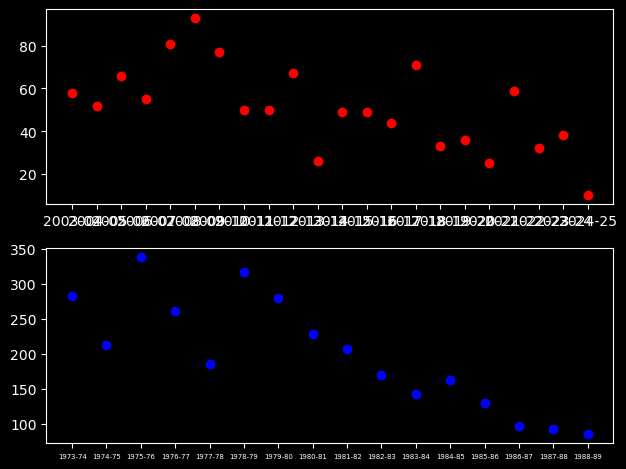

In [96]:
fig6, ax6 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax6[0].scatter(df1['SEASON_ID'], df1['BLK'], color = 'red')
ax6[1].scatter(df8['SEASON_ID'], df8['BLK'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Here we compare LeBron in Field Goals Made and Attempted to Kareem Abdul-Jabbar. LeBron is 2nd to Kareem in FGM and beats him in FGA. LeBron has 15012 FGM and 29676 FGA for a 50.6% success rate, while Kareem has 15837 FGM and 28307 FGA for a 55.9%. that is a 5.3% difference. However, LeBron is the greatest scorer of all time with 40935+ points and Kareem is second with 38387 points. This indicates that LeBron is taking consistently harder shots at the 3-point line since his scoring is higher than Kareem's by such a high amount. This would mean that being 50.6% in FG success with the amount of 3-pointers he has taken is more impressive.

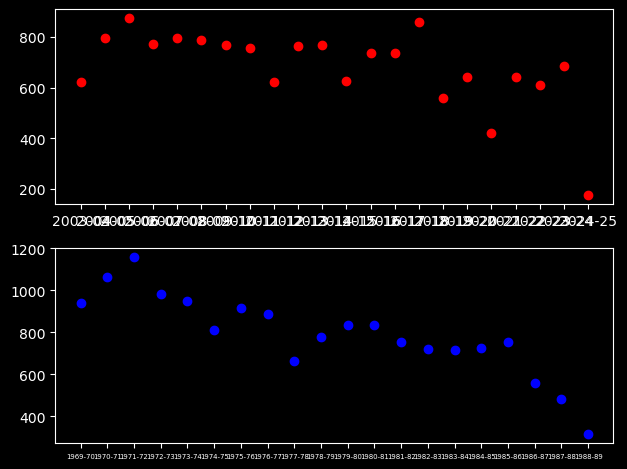

In [97]:
fig7, ax7 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax7[0].scatter(df1['SEASON_ID'], df1['FGM'], color = 'red')
ax7[1].scatter(df8['SEASON_ID'], df8['FGM'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

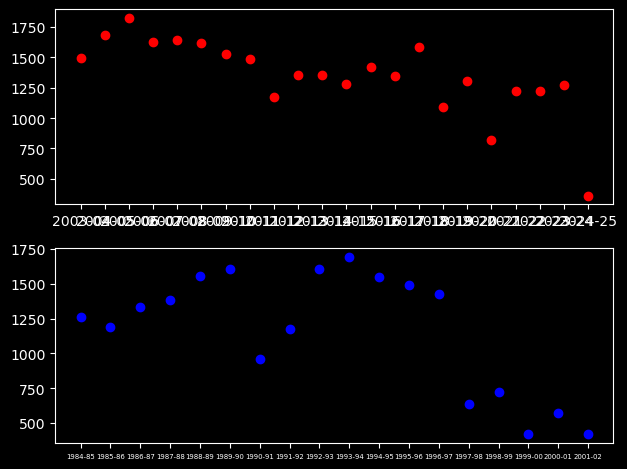

In [98]:
fig7, ax7 = plt.subplots(2)
plt.style.use('dark_background')
x = np.arange(100)
ax7[0].scatter(df1['SEASON_ID'], df1['FGA'], color = 'red')
ax7[1].scatter(df7['SEASON_ID'], df7['FGA'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

This stat is the percentage of Field Goals made. LeBron lands at an average of 50.6% while the leader DeAndre Jordan has a 67.4% success rate. This stat may be misleading since DeAndre Jordan has only taken 5603 FGA in his entire career compared to LeBron's 29676 FGA. Less quantity would indicate higher quality of shots. Therefore, I think that LeBron staying above a 50% average, even if by a small margin, is greatly more impressive than DeAndre Jordan's statistic.

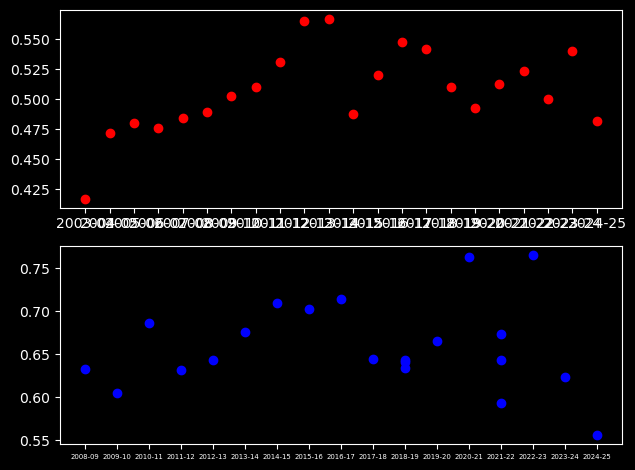

In [99]:
fig8, ax8 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax8[0].scatter(df1['SEASON_ID'], df1['FG_PCT'], color = 'red')
ax8[1].scatter(df9['SEASON_ID'], df9['FG_PCT'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

For the next two graphs, we will compare LeBron to Steph Curry, the greatest three-point shooter, and Point Guard of all time. LeBron is tied for 7th for 3-pointers made with 2450 and is 5th in 3-pointers attempted at 7042. Steph Curry has made 3814 3-pointers and attempted 8965. In percentage that is 34.8% for LeBron and 37.9% for Steph Curry. That is only a 3.1% difference from the greatest shooter of all time. Comparing positions, LeBron plays Small Forward, which does sometimes look for these shots, however, Steph Curry plays Point Guard who almost exclusively looks for these shots. 

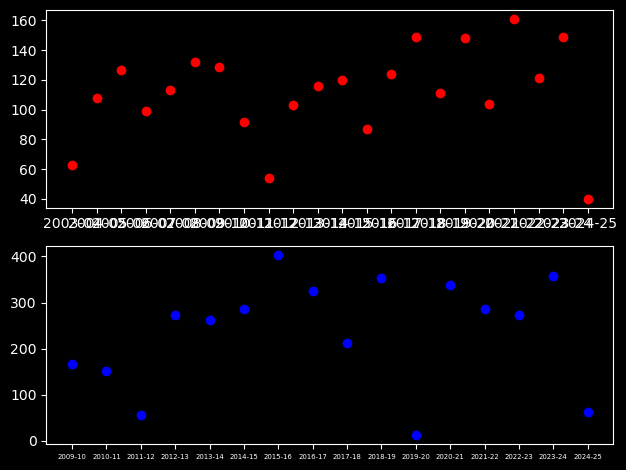

In [100]:
fig9, ax9 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax9[0].scatter(df1['SEASON_ID'], df1['FG3M'], color = 'red')
ax9[1].scatter(df10['SEASON_ID'], df10['FG3M'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

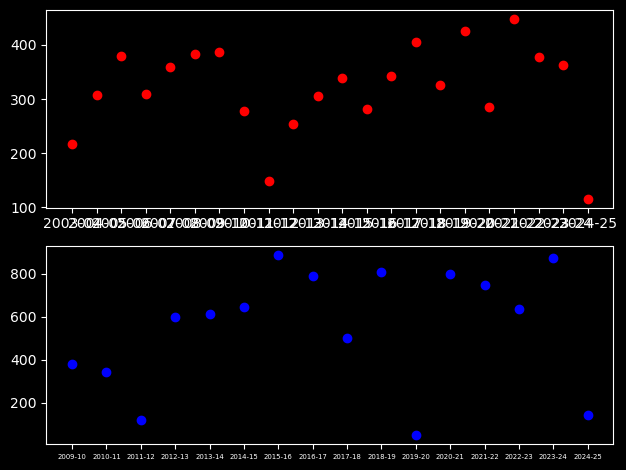

In [101]:
fig10, ax10 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax10[0].scatter(df1['SEASON_ID'], df1['FG3A'], color = 'red')
ax10[1].scatter(df10['SEASON_ID'], df10['FG3A'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

For the next two graphs we will compare LeBron to Karl Malone for Free Throws Made and Attempted. As seen below in the 2nd graph LeBron has shot 11499 FTs and made 8461 of them. Karl Malone has shot 13188 FTs and made 9787 of them. This gives LeBron a 66.4% Free Throw Percentage and Malone a 74.2% FTP. That is a 7.8% difference. What this also indicates is that to stop these player they were often fouled. This can be extrapolated that they were some of the biggest threats on the floor. 

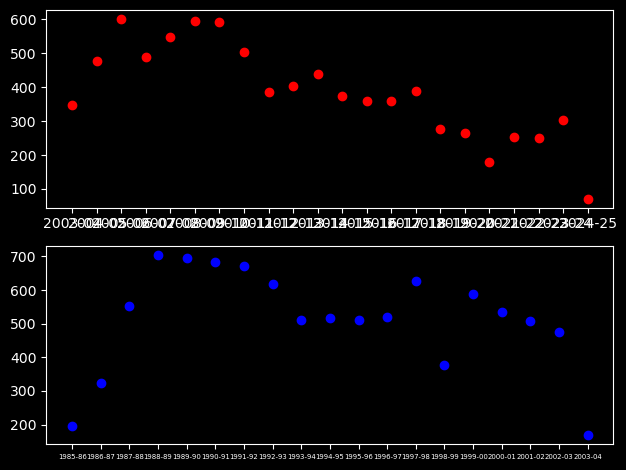

In [102]:
fig11, ax11 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax11[0].scatter(df1['SEASON_ID'], df1['FTM'], color = 'red')
ax11[1].scatter(df11['SEASON_ID'], df11['FTM'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

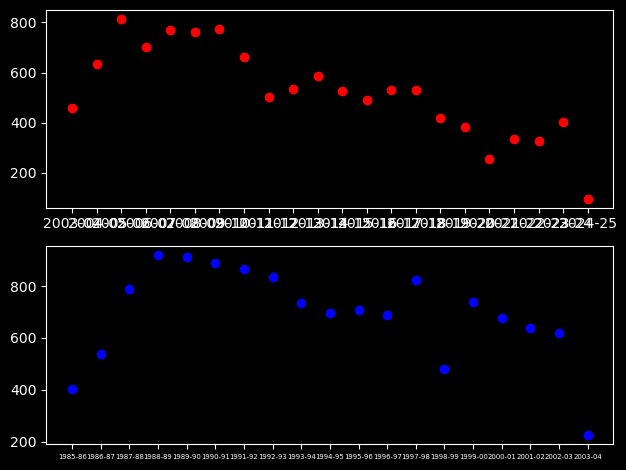

In [103]:
fig12, ax12 = plt.subplots(2) 
plt.style.use('dark_background')
x = np.arange(100)
ax12[0].scatter(df1['SEASON_ID'], df1['FTA'], color = 'red')
ax12[1].scatter(df11['SEASON_ID'], df11['FTA'], color = 'blue') 
plt.tick_params(axis = 'x', which = 'major', labelsize = 5)
plt.tight_layout()
plt.show()

Over all of these stats and comparing LeBron to each stat leader we have only seen him out of the top ten in 4 of the 12 stats compared. If we were to count the positive stats that LeBron is part of that we did not graph would still be only missing 4 for 14 stats. These two stats are total points and total games played. This indicates that LeBron is in 57.1% of all-time top tens for stats. That ties him with Kareem Abdul-Jabbar. That means that if we want to talk about the most complete players in the League LeBron and Kareem are statistically the top candidates. A blindspot in this data is it does not compare the competition these two players were putting up the stats against. LeBron played against the greatest team ever assembled in the 2015-2019 Golden State Warriors and was able to excel in these stats during that period even winning a championship over them. Kareem played in a less contentious period where the game was not as competitive. The one stat LeBron has over Kareem that is not accounted for is the number of positions played. LeBron has played 4 positions while Kareem only played one. LeBron is more versatile compared to Kareem. Therefore LeBron is more complete and the most complete player in NBA history.